## LEAD SCORE CASE STUDY

In [1]:
# importing libraries to Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing python built in libraries

import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing libraries to scale data
from sklearn.preprocessing import scale

from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)

### GENERIC FUNCTIONS

In [4]:
# function to give total numbers of null values & its percentage for the given dataframe
def get_nulls_report(df,apply_style="Y"):
    if apply_style=="Y":
        cm = sns.light_palette("orange", as_cmap=True)
        return pd.DataFrame([df.isnull().sum(),round(100*(df.isnull().sum()/len(df.index)), 2)]).T.rename(columns={0:'Total Nulls',1:'Nulls Percentage'}).\
sort_values(by='Nulls Percentage',ascending=False).style.background_gradient(cmap=cm)
    else:
        return pd.DataFrame([df.isnull().sum(),round(100*(df.isnull().sum()/len(df.index)), 2)]).T.rename(columns={0:'Total Nulls',1:'Nulls Percentage'}).\
sort_values(by='Nulls Percentage',ascending=False)

In [5]:
# function to get column names of passed variable type e.g. continuous or categorical
def get_variables_type(df,type_of_var):
    if type_of_var=="CATERGORICAL":
        return list(leads_df.select_dtypes(exclude=[np.number]).columns)
    else:
        return list(df.select_dtypes(include=[np.number]).columns)        

In [6]:
# function to get the frequency of values in a dataseries.
# this function also considers null values
def get_column_frequency(ds):
    return pd.DataFrame(ds.value_counts(dropna=False))

In [7]:
# function to replace values in columns
#Input to the functions are dataseries,from_val,to_value
def replace_colums_values(ds,to_val,from_val="null",replace="actual"):
    if replace=="nulls":
        ds.fillna(to_val,inplace=True)
    else:
        ds.replace(from_val,to_val,inplace=True)

In [8]:
# function to plot univariate plot (single variable/column) for the passed dataframe
def draw_univariate_plot(df):
 sns.set(style="darkgrid")   
 sns.set_palette(sns.color_palette("hls",20))
 
 for cols in df.columns:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[cols],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=cols,ax=ax[1],orient='v')
        plt.xticks(rotation='vertical',fontsize=12)
        plt.show()

In [9]:
# function to plot distribution & boxplot for continuous variables & countplot for categorical variables
def draw_plots(column_name,df,type_of_variable,hue=None,title=None):
 sns.set(style="darkgrid")   
 sns.set_palette(sns.color_palette("hls",20))
 
 if type_of_variable == "Continous" :
   fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
   ax[0].set_title("Distribution Plot")
   sns.distplot(df[column_name],ax=ax[0])
   ax[1].set_title("Box Plot")
   sns.boxplot(data =df, x=column_name,ax=ax[1],orient='v')
   plt.xticks(rotation='vertical',fontsize=12)
   plt.show()
    
 if type_of_variable == "Categorical" :
   fig, ax=plt.subplots(figsize=(14,8))
   plt.title(title)
   ax = sns.countplot(data = df, x= column_name, order=df[column_name].value_counts().index,hue = hue) 
   ax.set(xlabel=column_name, ylabel="Count")
   
   for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
            fontsize=12, color='black', ha='center', va='bottom')
   plt.xticks(rotation='vertical',fontsize=12)
   plt.show()

In [10]:
# function to train the model
def fit_GLM(X_train,Y_train):
    X_train1 = sm.add_constant(X_train)
    lm = sm.GLM(Y_train,X_train1, family = sm.families.Binomial()).fit() 
    print(lm.summary())
    return lm

In [11]:
# function to get variance inflation factors. This is used to check for multi collinearity
def getVIF(X_train):
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [12]:
# function to plot ROC (Reciever Operating Characteristics) curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### EXPLORATORY DATA ANALYSIS

In [13]:
# Read the CSV provided 
leads_df = pd.read_csv("Leads.csv")

# inspect the data
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
# check the shape of the lead dataframe
leads_df.shape

(9240, 37)

###### INFO - Total Records 9240 and columns is 37

In [15]:
# dataframe information
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

###### INFO - Seems like few of the columns have nulls values and we need to handle those

In [16]:
# check for duplicate values
print("INFO - Prospect Id is duplicate",sum(leads_df.duplicated(subset = 'Prospect ID')) != 0)

INFO - Prospect Id is duplicate False


In [17]:
#Total converted rate in the dataframe
(sum(leads_df.Converted)/len(leads_df.index))*100

38.53896103896104

###### INFO - Around 38% of the leads get converted 

#### CHECK NULL DATA INTO THE DATAFRAME LEADS_DF

In [18]:
# Fetch the nulls summary of the whole dataset ordered by descending
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [19]:
# Replace all the Select values in the dataframe to Nan
leads_df = leads_df.replace('Select', np.nan)

In [20]:
# Again fetch the nulls summary of the whole dataset ordered by descending
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


In [21]:
#create list of removed columns from original dataframe
null_col_df =get_nulls_report(leads_df,apply_style="N")
removed_columns = list(null_col_df[null_col_df['Nulls Percentage']>30].index)
removed_columns

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'City',
 'Specialization',
 'Tags']

In [22]:
# drop the columns from the dataframe
leads_df.drop(removed_columns, axis=1,inplace=True)

In [23]:
# check the dataframe again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
What is your current occupation                  6550 

In [24]:
# Since Lead Number and Prospect Id is unique across dataframe,hence this could be removed too 
leads_df.drop(['Prospect ID','Lead Number'], axis=1,inplace=True)
removed_columns.extend(['Prospect ID','Lead Number'])

In [25]:
# check the dataframe again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531 non-null object
Search                                           9240

In [26]:
#Change the column name spaces with underscore for ease of analysis
leads_df.columns = leads_df.columns.str.lower().str.strip().str.replace(' ','_')

In [27]:
# check the dataframe again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
lead_origin                                      9240 non-null object
lead_source                                      9204 non-null object
do_not_email                                     9240 non-null object
do_not_call                                      9240 non-null object
converted                                        9240 non-null int64
totalvisits                                      9103 non-null float64
total_time_spent_on_website                      9240 non-null int64
page_views_per_visit                             9103 non-null float64
last_activity                                    9137 non-null object
country                                          6779 non-null object
what_is_your_current_occupation                  6550 non-null object
what_matters_most_to_you_in_choosing_a_course    6531 non-null object
search                                           9240

In [28]:
# Fetch the categorical variable and the numerical variables
var_numeric     = get_variables_type(leads_df,type_of_var="NUMERIC")
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")

In [29]:
# display the numeric
var_numeric

['converted',
 'totalvisits',
 'total_time_spent_on_website',
 'page_views_per_visit']

In [30]:
# display the categorical
var_categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'last_activity',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [31]:
# Make the categorical variable consistent by changing the values to lower case
leads_df = leads_df.applymap (lambda x: x.lower().replace(' ','_') if  type(x) == str else x)
leads_df.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,update_me_on_supply_chain_content,get_updates_on_dm_content,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
1,api,organic_search,no,no,0,5.0,674,2.5,email_opened,india,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,no,email_opened
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,email_opened,india,student,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,yes,email_opened
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,converted_to_lead,india,unemployed,better_career_prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified


In [32]:
#Fetch the null report again 
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
what_matters_most_to_you_in_choosing_a_course,2709,29.32
what_is_your_current_occupation,2690,29.11
country,2461,26.63
totalvisits,137,1.48
page_views_per_visit,137,1.48
last_activity,103,1.11
lead_source,36,0.39
lead_origin,0,0
newspaper,0,0
a_free_copy_of_mastering_the_interview,0,0


In [33]:
# get value count for column 'what_matters_most_to_you_in_choosing_a_course'
get_column_frequency(leads_df.what_matters_most_to_you_in_choosing_a_course)

,what_matters_most_to_you_in_choosing_a_course
better_career_prospects,6528
NaN,2709
flexibility_&_convenience,2
other,1


In [34]:
#replace nulls by others 
#replace flexibility_&_convenience by others as the frequency is really low
replace_colums_values(leads_df.what_matters_most_to_you_in_choosing_a_course,to_val="other",replace='nulls')
replace_colums_values(leads_df.what_matters_most_to_you_in_choosing_a_course,to_val="other",from_val="flexibility_&_convenience")

In [35]:
# check value count for column 'what_matters_most_to_you_in_choosing_a_course'
get_column_frequency(leads_df.what_matters_most_to_you_in_choosing_a_course)

,what_matters_most_to_you_in_choosing_a_course
better_career_prospects,6528
other,2712


In [36]:
#Fetch the null report again 
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
what_is_your_current_occupation,2690,29.11
country,2461,26.63
totalvisits,137,1.48
page_views_per_visit,137,1.48
last_activity,103,1.11
lead_source,36,0.39
lead_origin,0,0
newspaper,0,0
a_free_copy_of_mastering_the_interview,0,0
i_agree_to_pay_the_amount_through_cheque,0,0


In [37]:
# get value count for column 'what_is_your_current_occupation'
get_column_frequency(leads_df.what_is_your_current_occupation)

,what_is_your_current_occupation
unemployed,5600
NaN,2690
working_professional,706
student,210
other,16
housewife,10
businessman,8


In [38]:
#replace nulls by others 
#replace housewife/businessman by others as the frequency is really low
replace_colums_values(leads_df.what_is_your_current_occupation,to_val="other",replace='nulls')
replace_colums_values(leads_df.what_is_your_current_occupation,to_val="other",from_val="housewife")
replace_colums_values(leads_df.what_is_your_current_occupation,to_val="other",from_val="businessman")

In [39]:
# check value count for column 'what_is_your_current_occupation'
get_column_frequency(leads_df.what_is_your_current_occupation)

,what_is_your_current_occupation
unemployed,5600
other,2724
working_professional,706
student,210


In [40]:
#Fetch the null report again 
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
country,2461,26.63
totalvisits,137,1.48
page_views_per_visit,137,1.48
last_activity,103,1.11
lead_source,36,0.39
lead_origin,0,0
x_education_forums,0,0
a_free_copy_of_mastering_the_interview,0,0
i_agree_to_pay_the_amount_through_cheque,0,0
get_updates_on_dm_content,0,0


In [41]:
# get value count for column 'country'
get_column_frequency(leads_df.country)

,country
india,6492
NaN,2461
united_states,69
united_arab_emirates,53
singapore,24
saudi_arabia,21
united_kingdom,15
australia,13
qatar,10
bahrain,7


In [42]:
#replace nulls by anonymous
replace_colums_values(leads_df.country,to_val="anonymous",replace='nulls')

# for countries with less than 10 values, replace them by other. This is done for dimensionality reduction
for k,v in dict(leads_df.country.value_counts()).items():
    if v < 10:
        leads_df.country.replace(k,'other',inplace=True)

In [43]:
# check value count for column 'country'
get_column_frequency(leads_df.country)

,country
india,6492
anonymous,2461
other,82
united_states,69
united_arab_emirates,53
singapore,24
saudi_arabia,21
united_kingdom,15
australia,13
qatar,10


In [44]:
#Fetch the null report again 
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
totalvisits,137,1.48
page_views_per_visit,137,1.48
last_activity,103,1.11
lead_source,36,0.39
lead_origin,0,0
x_education_forums,0,0
a_free_copy_of_mastering_the_interview,0,0
i_agree_to_pay_the_amount_through_cheque,0,0
get_updates_on_dm_content,0,0
update_me_on_supply_chain_content,0,0


In [45]:
# get value count for column 'totalvisits'
get_column_frequency(leads_df.totalvisits)

,totalvisits
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224
9.0,164


In [46]:
# check the median of totalvisits column
leads_df.totalvisits.median()

3.0

In [47]:
# replace the values of nulls with the median value
leads_df.totalvisits.fillna(leads_df.totalvisits.median(),inplace=True)

In [48]:
# recheck the median of totalvisits column
leads_df.totalvisits.median()

3.0

In [49]:
# get the value count for column totalvisits
get_column_frequency(leads_df.totalvisits)

,totalvisits
0.0,2189
2.0,1680
3.0,1443
4.0,1120
5.0,783
6.0,466
1.0,395
7.0,309
8.0,224
9.0,164


In [50]:
#Fetch the null report again 
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
page_views_per_visit,137,1.48
last_activity,103,1.11
lead_source,36,0.39
lead_origin,0,0
newspaper_article,0,0
a_free_copy_of_mastering_the_interview,0,0
i_agree_to_pay_the_amount_through_cheque,0,0
get_updates_on_dm_content,0,0
update_me_on_supply_chain_content,0,0
receive_more_updates_about_our_courses,0,0


In [51]:
# get the value count for column 'page_views_per_visit'
get_column_frequency(leads_df.page_views_per_visit)

,page_views_per_visit
0.00,2189
2.00,1795
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241
NaN,137


In [52]:
# check the median for column 'page_views_per_visit'
leads_df.page_views_per_visit.median()

2.0

In [53]:
#Imputing Nulls with Median for Numeric Column
leads_df.page_views_per_visit.fillna(leads_df.page_views_per_visit.median(),inplace=True)

In [54]:
# recheck the median for column 'page_views_per_visit'
leads_df.page_views_per_visit.median()

2.0

In [55]:
# check the value count for column 'page_views_per_visit'
get_column_frequency(leads_df.page_views_per_visit)

,page_views_per_visit
0.00,2189
2.00,1932
3.00,1196
4.00,896
1.00,651
5.00,517
1.50,306
6.00,244
2.50,241
7.00,133


In [56]:
#Fetch the null report again 
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
last_activity,103,1.11
lead_source,36,0.39
lead_origin,0,0
newspaper_article,0,0
a_free_copy_of_mastering_the_interview,0,0
i_agree_to_pay_the_amount_through_cheque,0,0
get_updates_on_dm_content,0,0
update_me_on_supply_chain_content,0,0
receive_more_updates_about_our_courses,0,0
through_recommendations,0,0


In [57]:
#check the data for null last_activity
leads_df[leads_df.last_activity.isnull()][['last_activity','last_notable_activity','converted']]

,last_activity,last_notable_activity,converted
77,NaN,modified,1
79,NaN,modified,1
81,NaN,modified,1
88,NaN,modified,1
120,NaN,modified,1
133,NaN,modified,1
134,NaN,modified,1
177,NaN,modified,1
179,NaN,modified,1
180,NaN,modified,1


In [58]:
#find the correlation between two
leads_df[['last_activity','last_notable_activity']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,last_activity,last_notable_activity
last_activity,1.000000,0.737304
last_notable_activity,0.737304,1.000000


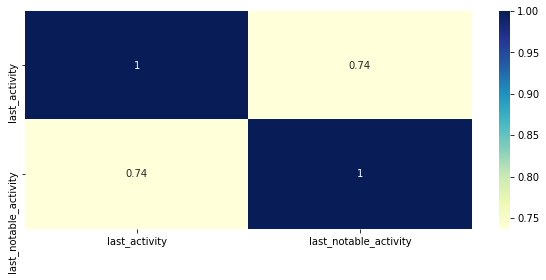

In [59]:
plt.figure(figsize = (10,4)) 
sns.heatmap(leads_df[['last_activity','last_notable_activity']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), annot=True,cmap="YlGnBu")
plt.show()

In [60]:
#The two columns are highly correlated ,hence we can drop column last_acitivty from the list 
leads_df.drop(['last_activity'],axis=1,inplace=True)
removed_columns.append('last_activity')

In [61]:
#Fetch the null report again 
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
lead_source,36,0.39
lead_origin,0,0
a_free_copy_of_mastering_the_interview,0,0
i_agree_to_pay_the_amount_through_cheque,0,0
get_updates_on_dm_content,0,0
update_me_on_supply_chain_content,0,0
receive_more_updates_about_our_courses,0,0
through_recommendations,0,0
digital_advertisement,0,0
newspaper,0,0


In [62]:
# check the value count for column 'lead_source'
get_column_frequency(leads_df.lead_source)

,lead_source
google,2873
direct_traffic,2543
olark_chat,1755
organic_search,1154
reference,534
welingak_website,142
referral_sites,125
facebook,55
NaN,36
bing,6


In [63]:
#replace nulls by anonymous

replace_colums_values(leads_df.lead_source,to_val="anonymous",replace='nulls')

# for lead_source with value less than 10, replace value with other
for k,v in dict(leads_df.lead_source.value_counts()).items():
    if v < 10:
        leads_df.lead_source.replace(k,'other',inplace=True)

In [64]:
# check the value count for column 'lead_source'
get_column_frequency(leads_df.lead_source)

,lead_source
google,2873
direct_traffic,2543
olark_chat,1755
organic_search,1154
reference,534
welingak_website,142
referral_sites,125
facebook,55
anonymous,36
other,23


In [65]:
#Fetch the null report again 
get_nulls_report(leads_df)

,Total Nulls,Nulls Percentage
lead_origin,0,0
lead_source,0,0
a_free_copy_of_mastering_the_interview,0,0
i_agree_to_pay_the_amount_through_cheque,0,0
get_updates_on_dm_content,0,0
update_me_on_supply_chain_content,0,0
receive_more_updates_about_our_courses,0,0
through_recommendations,0,0
digital_advertisement,0,0
newspaper,0,0


#### Find the unique value of the dataframe rows and drop columns wiht only one unique value

In [66]:
## Get categorical
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")
var_categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [67]:
#Drop column with only 1 unique value
for col in var_categorical:
        if leads_df[col].nunique() == 1:
            print("Drop Column - ",col)
            leads_df.drop([col],axis=1,inplace=True)
            removed_columns.append(col)

Drop Column -  magazine
Drop Column -  receive_more_updates_about_our_courses
Drop Column -  update_me_on_supply_chain_content
Drop Column -  get_updates_on_dm_content
Drop Column -  i_agree_to_pay_the_amount_through_cheque


In [68]:
# list of remaining categorical variables
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")
var_categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [69]:
# display value count for all categorical columns
for col in var_categorical:
    display(get_column_frequency(leads_df[col]).T)

,landing_page_submission,api,lead_add_form,lead_import,quick_add_form
lead_origin,4886,3580,718,55,1


,google,direct_traffic,olark_chat,organic_search,reference,welingak_website,referral_sites,facebook,anonymous,other
lead_source,2873,2543,1755,1154,534,142,125,55,36,23


,no,yes
do_not_email,8506,734


,no,yes
do_not_call,9238,2


,india,anonymous,other,united_states,united_arab_emirates,singapore,saudi_arabia,united_kingdom,australia,qatar
country,6492,2461,82,69,53,24,21,15,13,10


,unemployed,other,working_professional,student
what_is_your_current_occupation,5600,2724,706,210


,better_career_prospects,other
what_matters_most_to_you_in_choosing_a_course,6528,2712


,no,yes
search,9226,14


,no,yes
newspaper_article,9238,2


,no,yes
x_education_forums,9239,1


,no,yes
newspaper,9239,1


,no,yes
digital_advertisement,9236,4


,no,yes
through_recommendations,9233,7


,no,yes
a_free_copy_of_mastering_the_interview,6352,2888


,modified,email_opened,sms_sent,page_visited_on_website,olark_chat_conversation,email_link_clicked,email_bounced,unsubscribed,unreachable,had_a_phone_conversation,email_marked_spam,email_received,form_submitted_on_website,view_in_browser_link_clicked,approached_upfront,resubscribed_to_emails
last_notable_activity,3407,2827,2172,318,183,173,60,47,32,14,2,1,1,1,1,1


In [70]:
# Drop the columns with very low variance in the categories
for col in ['newspaper_article',
            'x_education_forums',
            'newspaper',
            'search',
            'digital_advertisement',
            'through_recommendations',
            'do_not_call']:
    leads_df.drop([col],axis=1,inplace=True)
    removed_columns.append(col)

In [71]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
lead_origin                                      9240 non-null object
lead_source                                      9240 non-null object
do_not_email                                     9240 non-null object
converted                                        9240 non-null int64
totalvisits                                      9240 non-null float64
total_time_spent_on_website                      9240 non-null int64
page_views_per_visit                             9240 non-null float64
country                                          9240 non-null object
what_is_your_current_occupation                  9240 non-null object
what_matters_most_to_you_in_choosing_a_course    9240 non-null object
a_free_copy_of_mastering_the_interview           9240 non-null object
last_notable_activity                            9240 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage:

#### OUTLIER DETECTION AND TREATMENT

In [72]:
# get list of all numeric columns
var_numeric = get_variables_type(leads_df,type_of_var="NUMERIC")

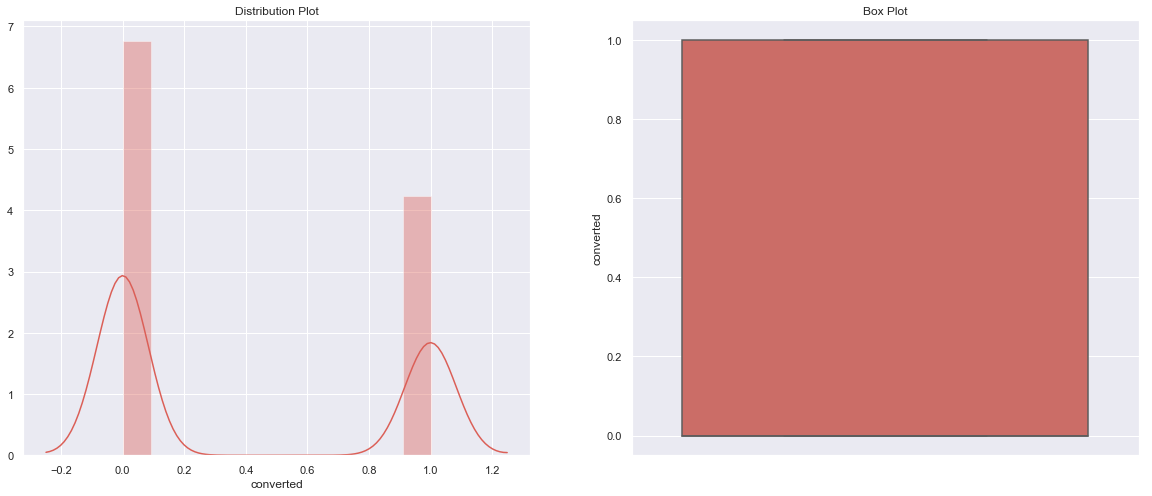

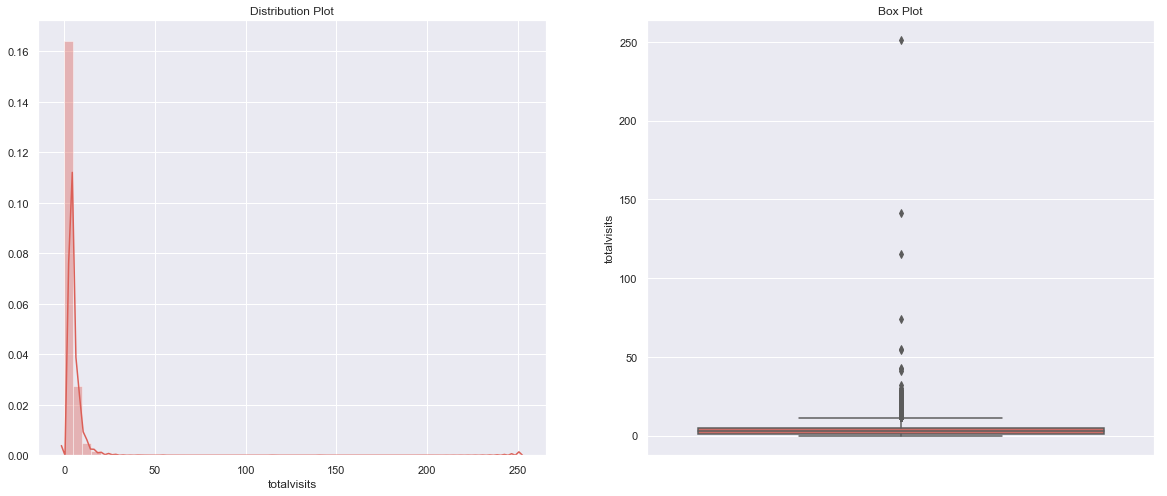

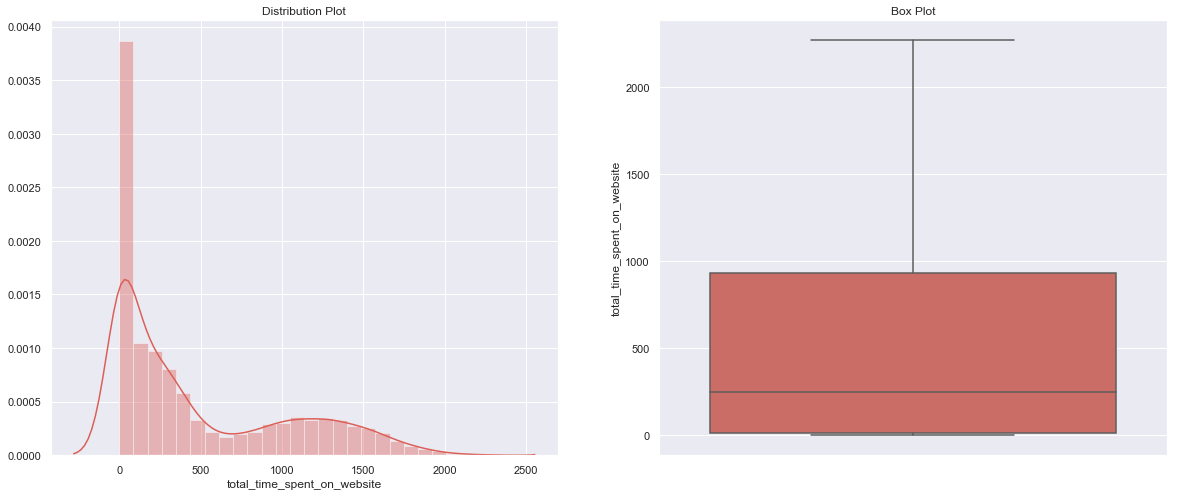

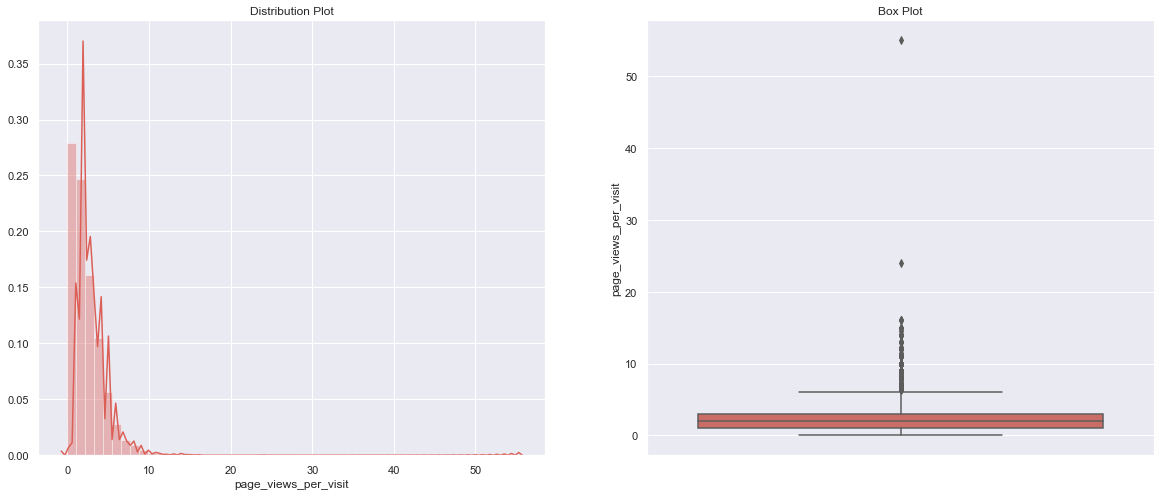

In [73]:
# plot distribution & box plot for all numeric variables/columns
draw_univariate_plot(leads_df[var_numeric])

In [74]:
# lets check the statistical summary of the numeric columns/variables
leads_df[var_numeric].describe()

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [75]:
# lets check the top 30 values (in descending order) for column totalvisits
leads_df[var_numeric]['totalvisits'].sort_values(ascending=False).head(30)

6102    251.0
2322    141.0
5608    115.0
5283     74.0
2190     55.0
5538     54.0
1160     43.0
8230     42.0
5530     41.0
6580     32.0
1824     30.0
8001     29.0
2861     29.0
4471     28.0
7153     28.0
7537     27.0
8624     27.0
7862     27.0
7421     27.0
2563     27.0
6702     26.0
5026     26.0
6099     25.0
9016     25.0
8203     25.0
7749     25.0
2323     25.0
5349     24.0
3315     24.0
8179     24.0
Name: totalvisits, dtype: float64

In [76]:
# lets check the top 30 values (in descending order) for column page_views_per_visit
leads_df[var_numeric]['page_views_per_visit'].sort_values(ascending=False).head(30)

2190    55.00
6805    24.00
5495    16.00
5164    16.00
125     16.00
387     15.00
5915    15.00
8640    15.00
4518    15.00
8001    14.50
6300    14.00
1697    14.00
5531    14.00
246     14.00
7685    14.00
6051    14.00
8322    14.00
2950    14.00
8218    14.00
292     13.00
579     13.00
5026    13.00
56      13.00
6695    13.00
6951    13.00
5283    12.33
168     12.00
7505    12.00
8281    12.00
4252    12.00
Name: page_views_per_visit, dtype: float64

In [77]:
## Remove outliers
leads_df['totalvisits']=np.where(leads_df['totalvisits']>30,30,leads_df['totalvisits'])
leads_df['page_views_per_visit']=np.where(leads_df['page_views_per_visit']>16,16,leads_df['page_views_per_visit'])

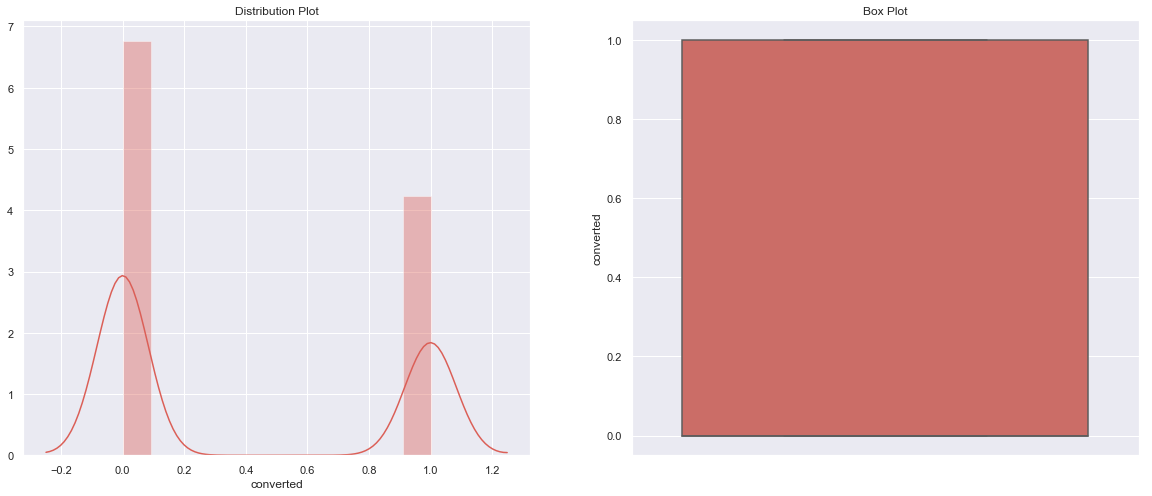

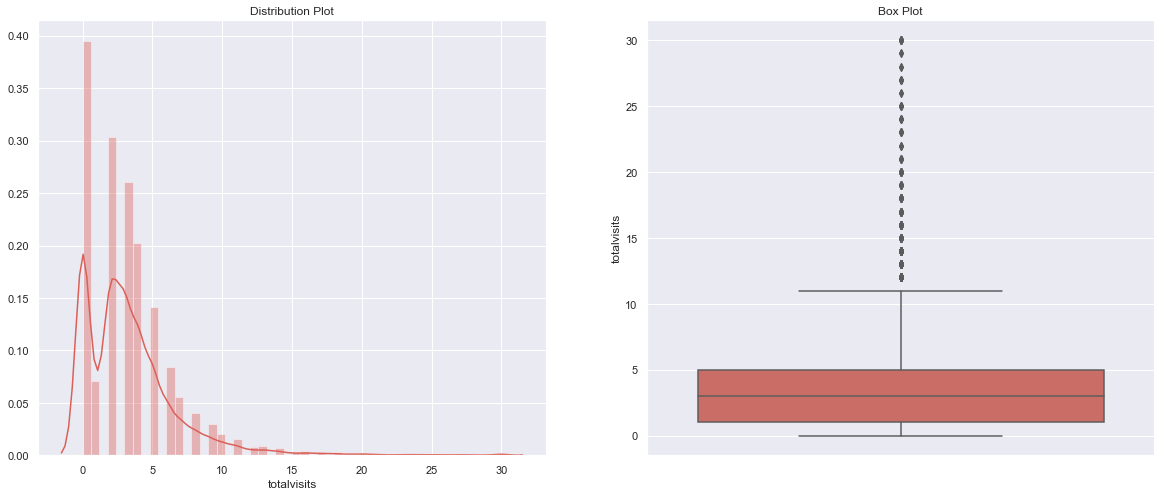

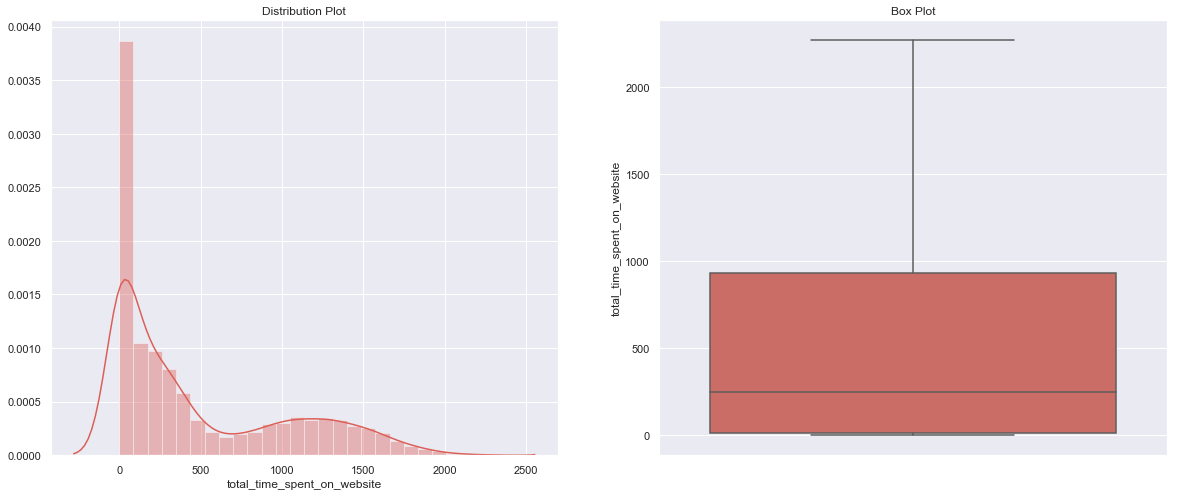

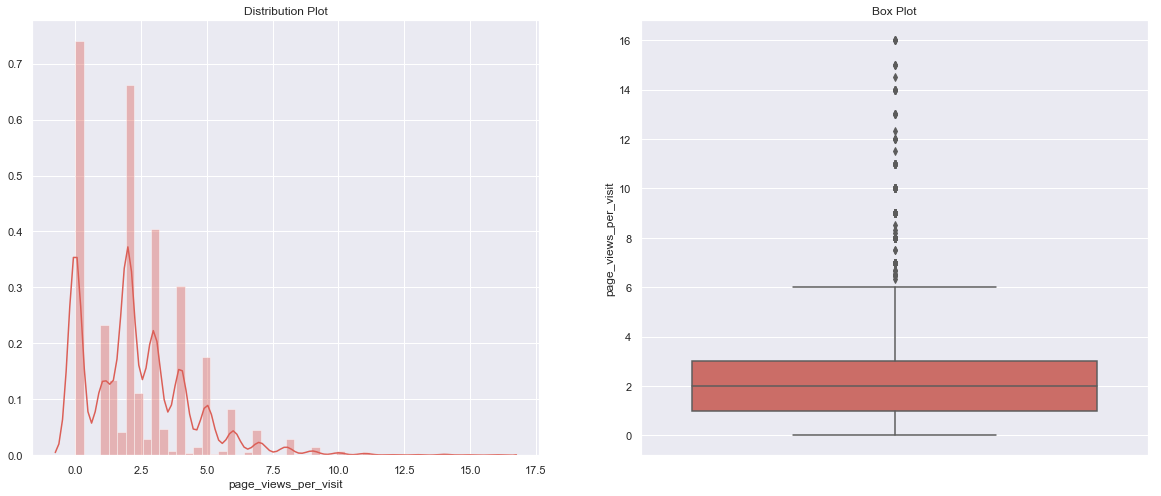

In [78]:
## Check again 
draw_univariate_plot(leads_df[var_numeric])

In [79]:
# list of categorical columns/variables
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")
var_categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'country',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

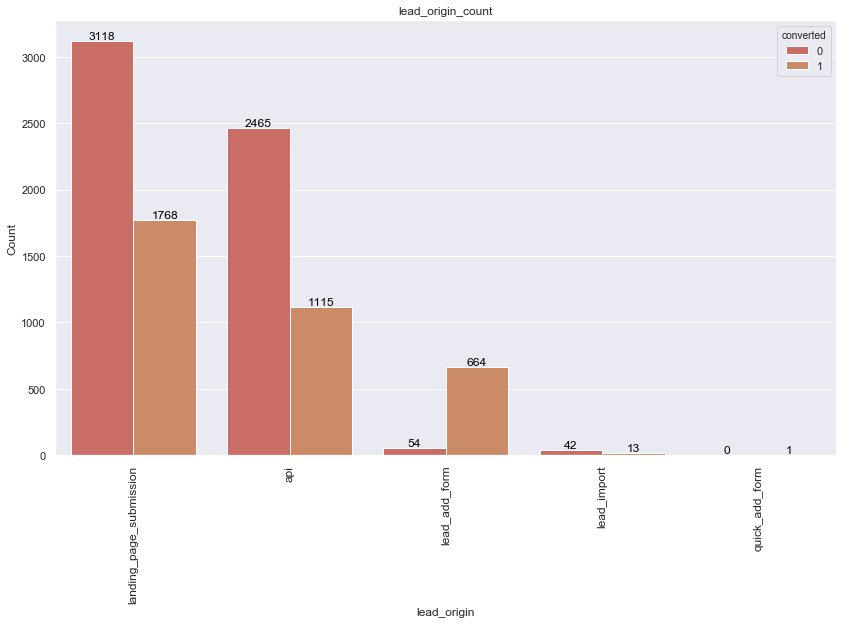

In [80]:
# draw count plot for categorical column lead_origin
draw_plots(column_name='lead_origin',title='lead_origin_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - seems like only lead_add_form have the highest converion and lead_import have the least conversion but the numbers are not that significant

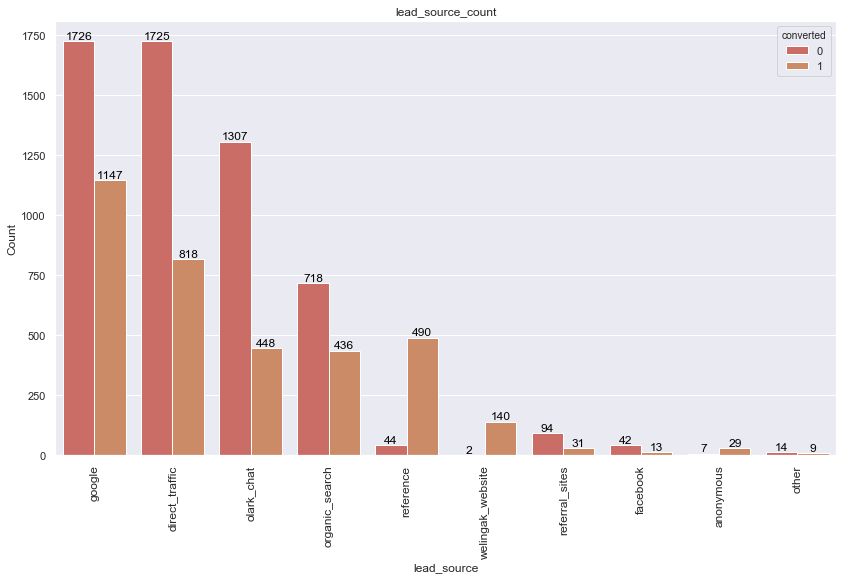

In [81]:
# draw count plot for categorical column lead_source
draw_plots(column_name='lead_source',title='lead_source_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - Seems like reference ,welinkage_website have higher conversion rate

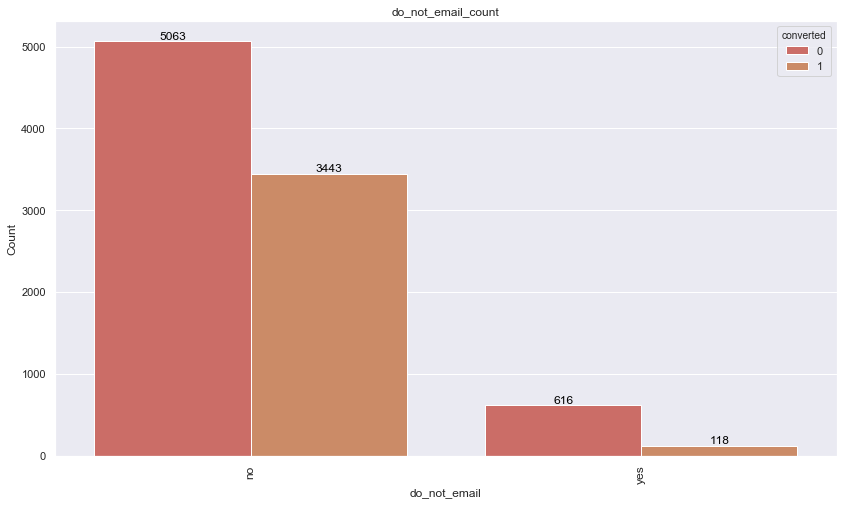

In [82]:
# draw count plot for categorical column do_not_email
draw_plots(column_name='do_not_email',title='do_not_email_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - For do_not_email to yes ,conversion is higher §

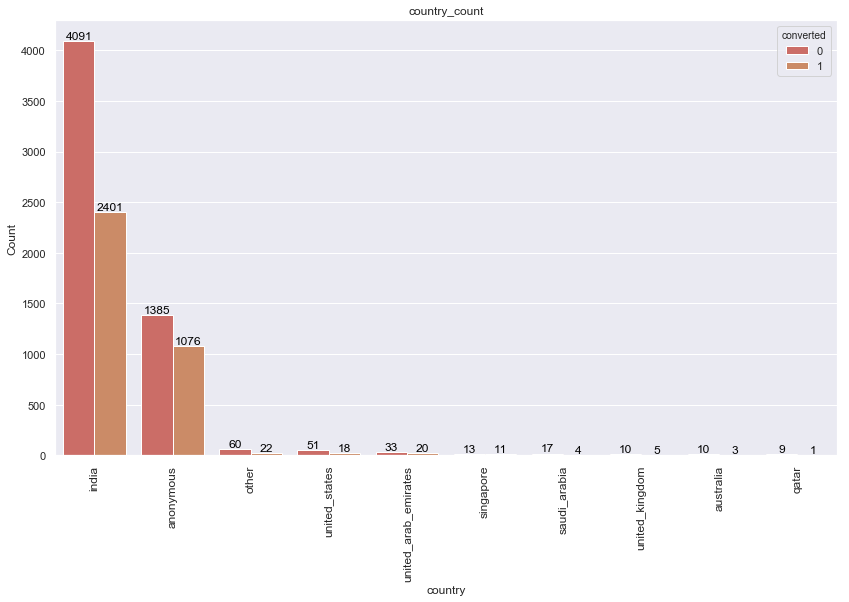

In [83]:
# draw count plot for categorical column country
draw_plots(column_name='country',title='country_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - the picture is not quite clear with the numbers ,but India/and anonymous is doing quite well with the conversion ,50% are converted

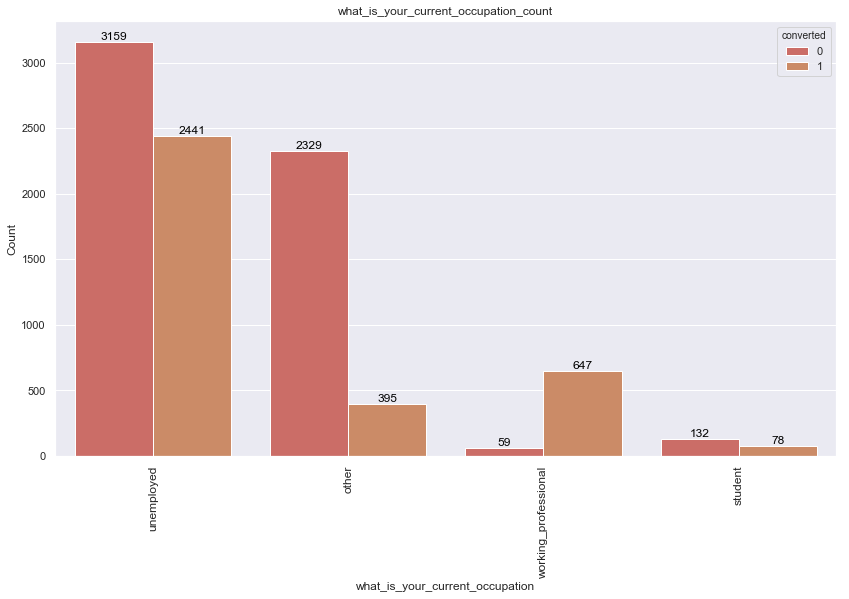

In [84]:
# draw count plot for categorical column what_is_your_current_occupation
draw_plots(column_name='what_is_your_current_occupation',title='what_is_your_current_occupation_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - Unemployed are higher in number for accepting the offer ,whereas working profession have a positive conversion ration compared to other occupations

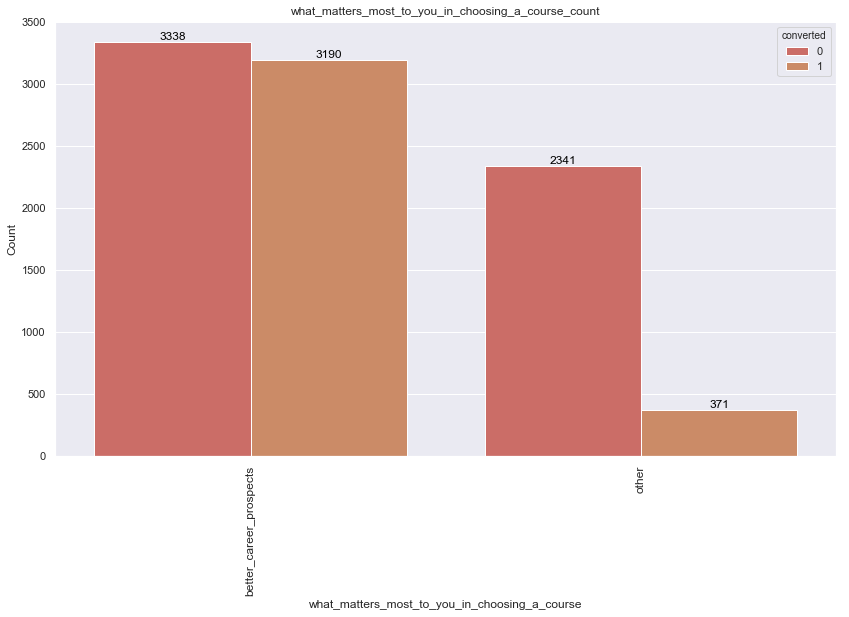

In [85]:
# draw count plot for categorical column what_matters_most_to_you_in_choosing_a_course
draw_plots(column_name='what_matters_most_to_you_in_choosing_a_course',title='what_matters_most_to_you_in_choosing_a_course_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - Better career option matters most to the people for opting the courses

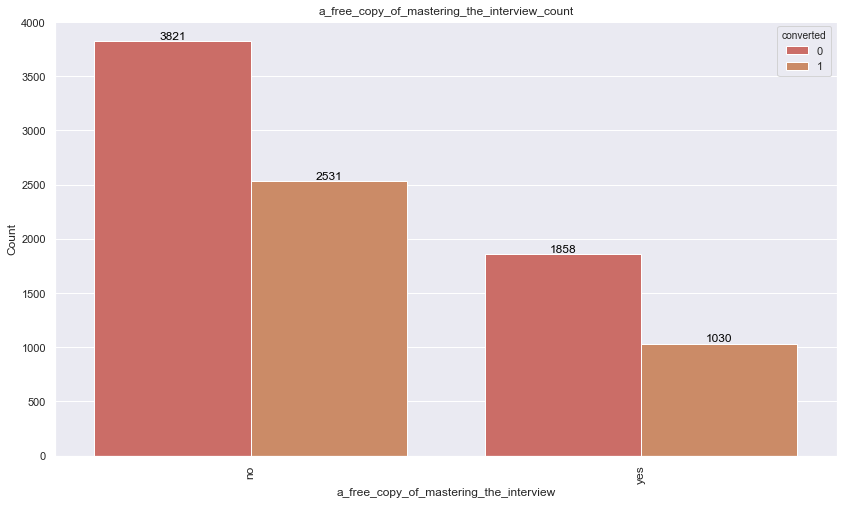

In [86]:
# draw count plot for categorical column a_free_copy_of_mastering_the_interview
draw_plots(column_name='a_free_copy_of_mastering_the_interview',title='a_free_copy_of_mastering_the_interview_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - Those which gets free copy of mastering the interview have higher conversion ration

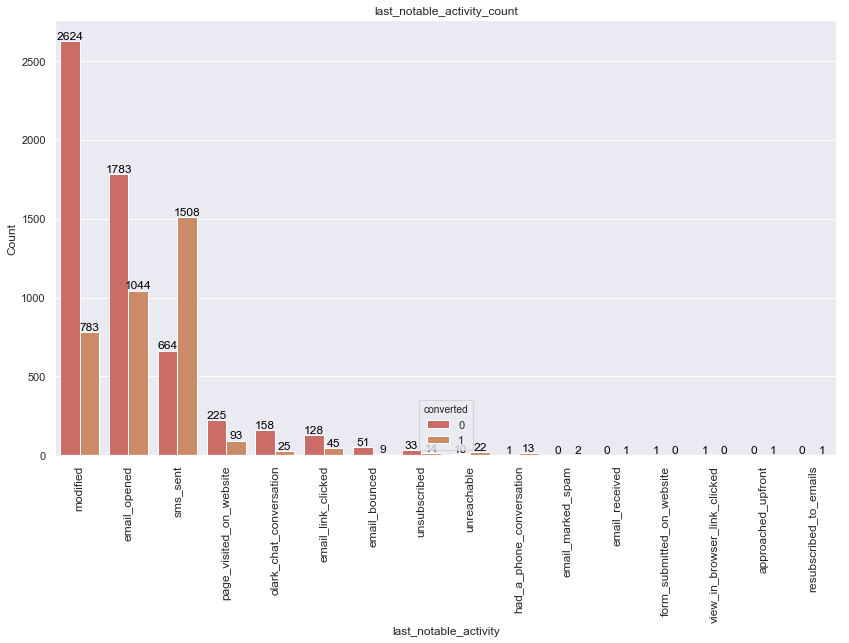

In [87]:
# draw count plot for categorical column last_notable_activity
draw_plots(column_name='last_notable_activity',title='last_notable_activity_count',df=leads_df,type_of_variable="Categorical",hue="converted")

INFO - modified/email_queued have good conversion ,whereas sms_sent has more conversion

#### Creating Dummy variables

In [88]:
### Binary Dummy variables needs to be changed into 1 and 0 combination 
leads_df['do_not_email'] = leads_df['do_not_email'].map({'yes': 1, 'no': 0})
leads_df['a_free_copy_of_mastering_the_interview'] = leads_df['a_free_copy_of_mastering_the_interview'].map({'yes': 1, 'no': 0})
leads_df['what_matters_most_to_you_in_choosing_a_course'] = leads_df['what_matters_most_to_you_in_choosing_a_course'].map({'better_career_prospects': 1, 'other': 0})

In [89]:
# columns after dummy variables creation
leads_df.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted', 'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit', 'country', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity'], dtype='object')

In [90]:
# Rest of the categorical variables needs to be fetched again for dummy variable createtion  
var_categorical = get_variables_type(leads_df,type_of_var="CATERGORICAL")
var_categorical

['lead_origin',
 'lead_source',
 'country',
 'what_is_your_current_occupation',
 'last_notable_activity']

In [91]:
leads_df.head()

,lead_origin,lead_source,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,country,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,a_free_copy_of_mastering_the_interview,last_notable_activity
0,api,olark_chat,0,0,0.0,0,0.0,anonymous,unemployed,1,0,modified
1,api,organic_search,0,0,5.0,674,2.5,india,unemployed,1,0,email_opened
2,landing_page_submission,direct_traffic,0,1,2.0,1532,2.0,india,student,1,1,email_opened
3,landing_page_submission,direct_traffic,0,0,1.0,305,1.0,india,unemployed,1,0,modified
4,landing_page_submission,google,0,1,2.0,1428,1.0,india,unemployed,1,0,modified


In [92]:
leads_df.shape

(9240, 12)

#### Create Dummy variable for the categorical variables

In [93]:
# creating dummy varibales for non-binary categorical columns/variables
final_leads_df = pd.get_dummies(leads_df,columns=var_categorical,drop_first=True)

In [94]:
#Check the final dataframe again on which model needs to be build
final_leads_df.head()

,do_not_email,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,what_matters_most_to_you_in_choosing_a_course,a_free_copy_of_mastering_the_interview,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_direct_traffic,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_other,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,country_australia,country_india,country_other,country_qatar,country_saudi_arabia,country_singapore,country_united_arab_emirates,country_united_kingdom,country_united_states,what_is_your_current_occupation_student,what_is_your_current_occupation_unemployed,what_is_your_current_occupation_working_professional,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [95]:
final_leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 47 columns):
do_not_email                                            9240 non-null int64
converted                                               9240 non-null int64
totalvisits                                             9240 non-null float64
total_time_spent_on_website                             9240 non-null int64
page_views_per_visit                                    9240 non-null float64
what_matters_most_to_you_in_choosing_a_course           9240 non-null int64
a_free_copy_of_mastering_the_interview                  9240 non-null int64
lead_origin_landing_page_submission                     9240 non-null uint8
lead_origin_lead_add_form                               9240 non-null uint8
lead_origin_lead_import                                 9240 non-null uint8
lead_origin_quick_add_form                              9240 non-null uint8
lead_source_direct_traffic                           

In [96]:
# Find the highest correlated pairs
import itertools
df = pd.DataFrame([[(i,j),final_leads_df.corr().loc[i,j]] for i,j in list(itertools.combinations(final_leads_df.corr(), 2))],columns=['pairs','corr'])    
df.sort_values(by='corr',ascending=False).head()

,pairs,corr
380,"(lead_origin_lead_import, lead_source_facebook)",0.981709
348,"(lead_origin_lead_add_form, lead_source_reference)",0.853237
244,"(what_matters_most_to_you_in_choosing_a_course, what_is_your_current_occupation_unemployed)",0.798003
92,"(totalvisits, page_views_per_visit)",0.672482
265,"(a_free_copy_of_mastering_the_interview, lead_source_direct_traffic)",0.598655


In [97]:
##Lets drop one of the pair having correlation higher then 70%
final_leads_df.drop(['lead_source_facebook','lead_source_reference','what_is_your_current_occupation_unemployed'],axis=1,inplace=True)

In [98]:
final_leads_df.shape

(9240, 44)

### MODEL BUILDING 

In [99]:
from sklearn.model_selection import train_test_split

# Remove the dependent variable from the final_leads dataframe
X = final_leads_df.drop(['converted'],axis=1)
X.head()

,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,what_matters_most_to_you_in_choosing_a_course,a_free_copy_of_mastering_the_interview,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_direct_traffic,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_other,lead_source_referral_sites,lead_source_welingak_website,country_australia,country_india,country_other,country_qatar,country_saudi_arabia,country_singapore,country_united_arab_emirates,country_united_kingdom,country_united_states,what_is_your_current_occupation_student,what_is_your_current_occupation_working_professional,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [100]:
# adding back the dependent variable  
y = final_leads_df['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [102]:
var_numeric

['converted',
 'totalvisits',
 'total_time_spent_on_website',
 'page_views_per_visit']

In [103]:
var_numeric.remove('converted')

In [104]:
# scale the train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[var_numeric] = scaler.fit_transform(X_train[var_numeric])

X_train.head()

C:\Users\haranand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\haranand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,do_not_email,totalvisits,total_time_spent_on_website,page_views_per_visit,what_matters_most_to_you_in_choosing_a_course,a_free_copy_of_mastering_the_interview,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_direct_traffic,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_other,lead_source_referral_sites,lead_source_welingak_website,country_australia,country_india,country_other,country_qatar,country_saudi_arabia,country_singapore,country_united_arab_emirates,country_united_kingdom,country_united_states,what_is_your_current_occupation_student,what_is_your_current_occupation_working_professional,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
1871,0,-0.951417,-0.885371,-1.137425,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.171687,0.005716,-0.491070,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.452463,-0.691418,0.077528,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.452463,1.365219,1.292480,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,-0.951417,-0.885371,-1.137425,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### RFE - Recursive Feature Elimination

In [105]:
# import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [106]:
# Running RFE with the output number of the variable equal to 12
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe.support_

array([ True, False,  True, False,  True, False, False,  True, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False])

In [108]:
# list of columns with rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('do_not_email', True, 1),
 ('totalvisits', False, 21),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 23),
 ('what_matters_most_to_you_in_choosing_a_course', True, 1),
 ('a_free_copy_of_mastering_the_interview', False, 31),
 ('lead_origin_landing_page_submission', False, 20),
 ('lead_origin_lead_add_form', True, 1),
 ('lead_origin_lead_import', False, 5),
 ('lead_origin_quick_add_form', False, 24),
 ('lead_source_direct_traffic', True, 1),
 ('lead_source_google', False, 3),
 ('lead_source_olark_chat', False, 25),
 ('lead_source_organic_search', False, 2),
 ('lead_source_other', False, 30),
 ('lead_source_referral_sites', True, 1),
 ('lead_source_welingak_website', True, 1),
 ('country_australia', False, 13),
 ('country_india', False, 17),
 ('country_other', False, 16),
 ('country_qatar', True, 1),
 ('country_saudi_arabia', False, 7),
 ('country_singapore', False, 15),
 ('country_united_arab_emirates', False, 22),
 ('country_united_kingdom', False, 18),
 (

In [109]:
#columns that are supported
col_supported = X_train.columns[rfe.support_]
col_supported

Index(['do_not_email', 'total_time_spent_on_website', 'what_matters_most_to_you_in_choosing_a_course', 'lead_origin_lead_add_form', 'lead_source_direct_traffic', 'lead_source_referral_sites', 'lead_source_welingak_website', 'country_qatar', 'what_is_your_current_occupation_working_professional', 'last_notable_activity_had_a_phone_conversation', 'last_notable_activity_sms_sent', 'last_notable_activity_unreachable'], dtype='object')

In [110]:
#columns that are not supported
col_not_supported = X_train.columns[~rfe.support_]
col_not_supported

Index(['totalvisits', 'page_views_per_visit', 'a_free_copy_of_mastering_the_interview', 'lead_origin_landing_page_submission', 'lead_origin_lead_import', 'lead_origin_quick_add_form', 'lead_source_google', 'lead_source_olark_chat', 'lead_source_organic_search', 'lead_source_other', 'country_australia', 'country_india', 'country_other', 'country_saudi_arabia', 'country_singapore', 'country_united_arab_emirates', 'country_united_kingdom', 'country_united_states', 'what_is_your_current_occupation_student', 'last_notable_activity_email_bounced', 'last_notable_activity_email_link_clicked', 'last_notable_activity_email_marked_spam', 'last_notable_activity_email_opened', 'last_notable_activity_email_received', 'last_notable_activity_form_submitted_on_website', 'last_notable_activity_modified', 'last_notable_activity_olark_chat_conversation', 'last_notable_activity_page_visited_on_website', 'last_notable_activity_resubscribed_to_emails', 'last_notable_activity_unsubscribed',
       'last_notab

In [111]:
# drop columns which are not selected by RFE
X_train_rfe = X_train.drop(col_not_supported,1)
X_train_rfe.head()

,do_not_email,total_time_spent_on_website,what_matters_most_to_you_in_choosing_a_course,lead_origin_lead_add_form,lead_source_direct_traffic,lead_source_referral_sites,lead_source_welingak_website,country_qatar,what_is_your_current_occupation_working_professional,last_notable_activity_had_a_phone_conversation,last_notable_activity_sms_sent,last_notable_activity_unreachable
1871,0,-0.885371,1,0,0,0,0,0,0,0,0,0
6795,0,0.005716,1,0,1,0,0,0,0,0,0,0
3516,0,-0.691418,1,0,0,0,0,0,0,0,0,0
8105,0,1.365219,1,0,0,0,0,0,0,0,1,0
3934,0,-0.885371,1,0,0,0,0,0,0,0,0,0


### Building model using statsmodel, for the detailed statistics

In [112]:
# Getting the predicted values on the train set
import statsmodels.api as sm  

In [113]:
# fit GLM
log_reg_m1 = fit_GLM(X_train_rfe,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.3
Date:                Sun, 05 Jan 2020   Deviance:                       5426.7
Time:                        09:13:30   Pearson chi2:                 6.71e+03
No. Iterations:                    21   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [114]:
# check variance inflation factor for train data
getVIF(X_train_rfe)

,Features,VIF
2,what_matters_most_to_you_in_choosing_a_course,1.87
3,lead_origin_lead_add_form,1.48
10,last_notable_activity_sms_sent,1.38
4,lead_source_direct_traffic,1.36
6,lead_source_welingak_website,1.24
8,what_is_your_current_occupation_working_professional,1.20
0,do_not_email,1.08
1,total_time_spent_on_website,1.06
5,lead_source_referral_sites,1.01
7,country_qatar,1.00


In [115]:
# Getting the predicted values on the train set
y_train_pred = log_reg_m1.predict(sm.add_constant(X_train_rfe))
y_train_pred[:10]

1871    0.153769
6795    0.198339
3516    0.179333
8105    0.874799
3934    0.153769
4844    0.987986
3297    0.174017
8071    0.988442
987     0.146950
7423    0.925779
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1537685 , 0.19833867, 0.17933276, 0.87479942, 0.1537685 ,
       0.98798613, 0.17401709, 0.98844192, 0.14695035, 0.92577925])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                   'Conversion_Prob':y_train_pred,
                                   'Lead_Score': y_train_pred*100})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID
0,0,0.153769,15.376850,1871
1,0,0.198339,19.833867,6795
2,0,0.179333,17.933276,3516
3,0,0.874799,87.479942,8105
4,0,0.153769,15.376850,3934


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# check the dataframe
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted
0,0,0.153769,15.376850,1871,0
1,0,0.198339,19.833867,6795,0
2,0,0.179333,17.933276,3516,0
3,0,0.874799,87.479942,8105,1
4,0,0.153769,15.376850,3934,0


In [119]:
# Create Confusion Matrix for the same
confusion_mtrx = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion_mtrx

array([[3529,  473],
       [ 784, 1682]], dtype=int64)

In [120]:
# Check the overall accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8056586270871985

In [121]:
## Lets drop the Country_qatar column with P value highest amoung all 
X_train_rfe = X_train_rfe.drop('country_qatar',axis=1)

In [122]:
X_train_rfe.shape

(6468, 11)

### Lets Rebuild the model 

In [123]:
# fit GLM
log_reg_m2 = fit_GLM(X_train_rfe,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.5
Date:                Sun, 05 Jan 2020   Deviance:                       5435.0
Time:                        09:13:31   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [124]:
# check variance inflation factor for train data
getVIF(X_train_rfe)

,Features,VIF
2,what_matters_most_to_you_in_choosing_a_course,1.87
3,lead_origin_lead_add_form,1.48
9,last_notable_activity_sms_sent,1.38
4,lead_source_direct_traffic,1.36
6,lead_source_welingak_website,1.24
7,what_is_your_current_occupation_working_professional,1.20
0,do_not_email,1.08
1,total_time_spent_on_website,1.06
5,lead_source_referral_sites,1.01
8,last_notable_activity_had_a_phone_conversation,1.00


In [125]:
y_train_pred = log_reg_m2.predict(sm.add_constant(X_train_rfe)).values.reshape(-1)

In [126]:
y_train_pred[:10]

array([0.15363242, 0.19734952, 0.1791357 , 0.87409798, 0.15363242,
       0.98790137, 0.17383298, 0.98847548, 0.14721492, 0.92527534])

In [127]:
##### Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 
                                   'Conversion_Prob':y_train_pred,
                                   'Lead_Score': y_train_pred*100})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID
0,0,0.153632,15.363242,1871
1,0,0.197350,19.734952,6795
2,0,0.179136,17.913570,3516
3,0,0.874098,87.409798,8105
4,0,0.153632,15.363242,3934


In [128]:
##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted
0,0,0.153632,15.363242,1871,0
1,0,0.197350,19.734952,6795,0
2,0,0.179136,17.913570,3516,0
3,0,0.874098,87.409798,8105,1
4,0,0.153632,15.363242,3934,0


In [129]:
# Confusion matrix 
confusion_mtrx = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion_mtrx

array([[3529,  473],
       [ 787, 1679]], dtype=int64)

In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8051948051948052

In [131]:
# Since the P-value of lead_source_referral_sites is higher, lets drop this column
X_train_rfe = X_train_rfe.drop('lead_source_referral_sites',axis=1)

In [132]:
# fit GLM
log_reg_m3 = fit_GLM(X_train_rfe,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.7
Date:                Sun, 05 Jan 2020   Deviance:                       5437.3
Time:                        09:13:32   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [133]:
##### Check the variation inflation factor
getVIF(X_train_rfe)

,Features,VIF
2,what_matters_most_to_you_in_choosing_a_course,1.85
3,lead_origin_lead_add_form,1.48
8,last_notable_activity_sms_sent,1.38
4,lead_source_direct_traffic,1.36
5,lead_source_welingak_website,1.24
6,what_is_your_current_occupation_working_professional,1.20
0,do_not_email,1.08
1,total_time_spent_on_website,1.06
7,last_notable_activity_had_a_phone_conversation,1.00
9,last_notable_activity_unreachable,1.00


In [134]:
y_train_pred = log_reg_m3.predict(sm.add_constant(X_train_rfe)).values.reshape(-1)

In [135]:
y_train_pred[:10]

array([0.15249932, 0.1972109 , 0.17781869, 0.87338701, 0.15249932,
       0.98790888, 0.1725536 , 0.98844309, 0.21045793, 0.92477573])

In [136]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 
                                   'Conversion_Prob':y_train_pred,
                                   'Lead_Score': y_train_pred*100})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID
0,0,0.152499,15.249932,1871
1,0,0.197211,19.721090,6795
2,0,0.177819,17.781869,3516
3,0,0.873387,87.338701,8105
4,0,0.152499,15.249932,3934


In [137]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted
0,0,0.152499,15.249932,1871,0
1,0,0.197211,19.721090,6795,0
2,0,0.177819,17.781869,3516,0
3,0,0.873387,87.338701,8105,1
4,0,0.152499,15.249932,3934,0


In [138]:
# Confusion matrix 
confusion_mtrx = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion_mtrx

array([[3532,  470],
       [ 790, 1676]], dtype=int64)

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8051948051948052

In [140]:
getVIF(X_train_rfe)

,Features,VIF
2,what_matters_most_to_you_in_choosing_a_course,1.85
3,lead_origin_lead_add_form,1.48
8,last_notable_activity_sms_sent,1.38
4,lead_source_direct_traffic,1.36
5,lead_source_welingak_website,1.24
6,what_is_your_current_occupation_working_professional,1.20
0,do_not_email,1.08
1,total_time_spent_on_website,1.06
7,last_notable_activity_had_a_phone_conversation,1.00
9,last_notable_activity_unreachable,1.00


In [141]:
list(X_train_rfe.columns)

['do_not_email',
 'total_time_spent_on_website',
 'what_matters_most_to_you_in_choosing_a_course',
 'lead_origin_lead_add_form',
 'lead_source_direct_traffic',
 'lead_source_welingak_website',
 'what_is_your_current_occupation_working_professional',
 'last_notable_activity_had_a_phone_conversation',
 'last_notable_activity_sms_sent',
 'last_notable_activity_unreachable']

So the final Sets of column will be 
- do_not_email
- total_time_spent_on_website
- what_matters_most_to_you_in_choosing_a_course
- lead_origin_lead_add_form
- lead_source_direct_traffic
- lead_source_welingak_website
- what_is_your_current_occupation_working_professional
- last_notable_activity_had_a_phone_conversation
- last_notable_activity_sms_sent
- last_notable_activity_unreachable

In [142]:
round(log_reg_m3.params.sort_values(ascending=False),4)

last_notable_activity_had_a_phone_conversation          3.3494
lead_origin_lead_add_form                               3.0386
what_is_your_current_occupation_working_professional    2.5336
lead_source_welingak_website                            1.9816
last_notable_activity_unreachable                       1.9113
last_notable_activity_sms_sent                          1.5120
what_matters_most_to_you_in_choosing_a_course           1.0213
total_time_spent_on_website                             0.9483
lead_source_direct_traffic                             -0.5337
do_not_email                                           -1.2783
const                                                  -1.8967
dtype: float64

The Top 3 Original Variables are 
- Last Notable Acitivity
- Lead Origin
- what_is_your_current_occupation

The Top 3 categorical/dummy varibles are
- last_notable_activity_had_a_phone_conversation
- lead_origin_lead_add_form
- what_is_your_current_occupation_working_professional

#### METRICS - Visualizing Precision and Recall

In [143]:
TP = confusion_mtrx[1,1] # true positive 
TN = confusion_mtrx[0,0] # true negatives
FP = confusion_mtrx[0,1] # false positives
FN = confusion_mtrx[1,0] # false negatives

In [144]:
#Sensitivity
(TP / float(TP+FN))*100

67.96431467964314

In [145]:
#Specificity
(TN / float(TN+FP))*100

88.25587206396801

In [146]:
#False Positive Rate
(FP/ float(TN+FP))*100

11.744127936031983

In [147]:
# Positive Predictive rate
(TP / float(TP+FP))*100

78.09878844361603

In [148]:
# Negative Predictive rate
(TN / float(TN+ FN))*100

81.72142526608052

#### Plot ROC Curve 

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

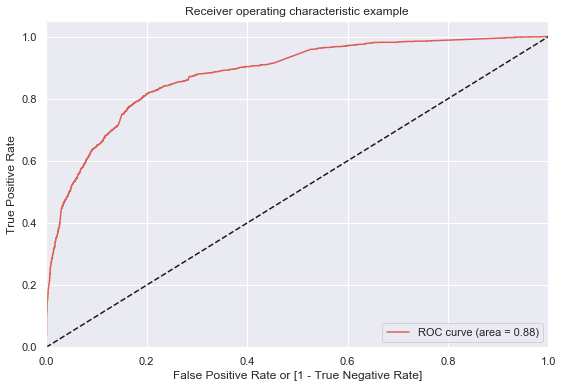

In [150]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Calcluate Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [151]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.152499,15.249932,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.197211,19.721090,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.177819,17.781869,3516,0,1,1,0,0,0,0,0,0,0,0
3,0,0.873387,87.338701,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.152499,15.249932,3934,0,1,1,0,0,0,0,0,0,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.594620  0.979319  0.357571
0.2   0.2  0.750464  0.884428  0.667916
0.3   0.3  0.798392  0.828062  0.780110
0.4   0.4  0.811843  0.775750  0.834083
0.5   0.5  0.805195  0.679643  0.882559
0.6   0.6  0.797310  0.592457  0.923538
0.7   0.7  0.784632  0.516221  0.950025
0.8   0.8  0.751701  0.391727  0.973513
0.9   0.9  0.719542  0.281833  0.989255


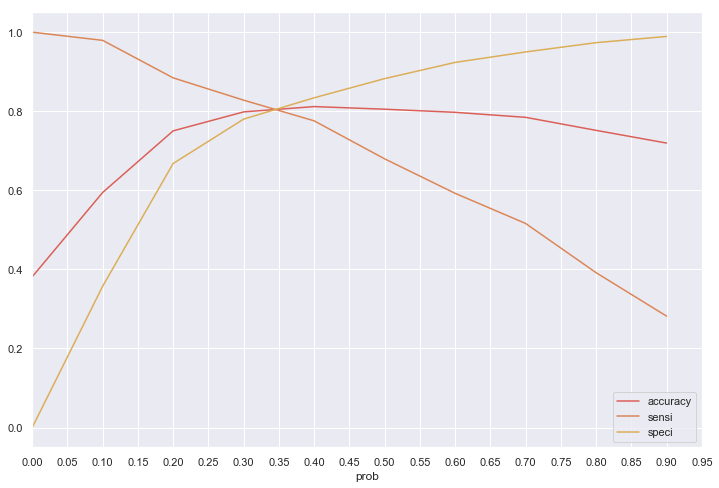

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(12,8))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### Precision  and recall 

In [154]:
from sklearn.metrics import precision_recall_curve

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

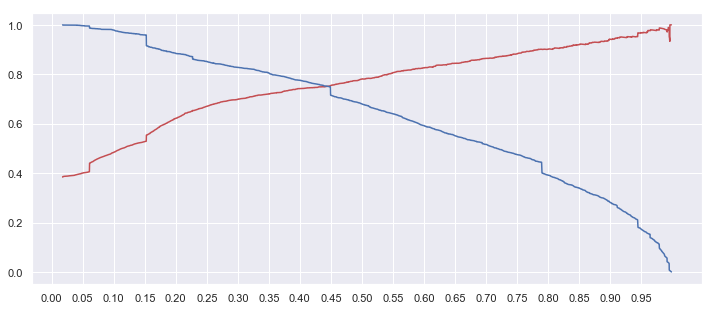

In [156]:
plt.figure(figsize=(12,5))
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "b-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From Precision and Recall Trade off , the convergence is between 0.4 and 0.45

** Considering  we can chooose the cut-off as 0.44 and use the Precision-Recall-Accuracy metrics to evaluate the model **

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.152499,15.249932,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.197211,19.721090,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.177819,17.781869,3516,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.873387,87.338701,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.152499,15.249932,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [158]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.809678416821274

In [159]:
confusion_mtrx2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_mtrx2

array([[3381,  621],
       [ 610, 1856]], dtype=int64)

In [160]:
TP = confusion_mtrx2[1,1] # true positive 
TN = confusion_mtrx2[0,0] # true negatives
FP = confusion_mtrx2[0,1] # false positives
FN = confusion_mtrx2[1,0] # false negatives

In [161]:
# Sensitivity
(TP / float(TP+FN))*100

75.26358475263585

In [162]:
# Speicificity
(TN / float(TN+FP))*100

84.48275862068965

In [163]:
#false postive rate
(FP/ float(TN+FP))*100

15.517241379310345

In [164]:
#Positive Predicted rate
(TP / float(TP+FP))*100

74.92935002018571

In [165]:
#Negative Predicted rate
(TN / float(TN+ FN))*100

84.71561012277624

In [166]:
### Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.809678416821274

In [167]:
# Precision 
(TP / (TP + FP))*100

74.92935002018571

In [168]:
# Recall 
(TP / (TP + FN))*100

75.26358475263585

### Test the data using Trained model

In [169]:
X_test[var_numeric] = scaler.transform(X_test[var_numeric])

C:\Users\haranand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [170]:
X_test = X_test[list(X_train_rfe.columns)]
X_test.head()

,do_not_email,total_time_spent_on_website,what_matters_most_to_you_in_choosing_a_course,lead_origin_lead_add_form,lead_source_direct_traffic,lead_source_welingak_website,what_is_your_current_occupation_working_professional,last_notable_activity_had_a_phone_conversation,last_notable_activity_sms_sent,last_notable_activity_unreachable
4269,0,0.964504,0,0,1,0,0,0,1,0
2376,0,-0.885371,1,1,0,0,0,0,1,0
7766,0,-0.777416,1,0,0,0,1,0,0,1
9199,0,-0.885371,1,0,0,0,0,0,0,0
4359,0,-0.885371,1,1,0,0,0,0,0,0


In [171]:
X_test_sm = sm.add_constant(X_test)

In [172]:
y_test_pred = log_reg_m3.predict(X_test_sm)

In [173]:
y_test_pred[:10]

4269    0.499057
2376    0.944566
7766    0.944388
9199    0.152499
4359    0.789762
9186    0.702424
1631    0.510664
8963    0.222685
8007    0.105320
5324    0.518627
dtype: float64

In [174]:
y_pred_m1 = pd.DataFrame(y_test_pred)

In [175]:
# check the data
y_pred_m1.head()

,0
4269,0.499057
2376,0.944566
7766,0.944388
9199,0.152499
4359,0.789762


In [176]:
y_test_df = pd.DataFrame(y_test)

In [177]:
# Putting Lead_ID to index
y_test_df['Lead_ID'] = y_test_df.index

In [178]:
y_pred_m1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
## final DF
y_pred_final = pd.concat([y_test_df, y_pred_m1 , y_pred_m1*100],axis=1)

In [180]:
y_pred_final.head()

,converted,Lead_ID,0,0
0,1,4269,0.499057,49.905664
1,1,2376,0.944566,94.456579
2,1,7766,0.944388,94.438848
3,0,9199,0.152499,15.249932
4,1,4359,0.789762,78.976242


In [181]:
y_pred_final.columns = [ 'Converted' , 'Lead_ID', 'Conversion_Prob' , 'Lead_Score']

In [182]:
y_pred_final.head()

,Converted,Lead_ID,Conversion_Prob,Lead_Score
0,1,4269,0.499057,49.905664
1,1,2376,0.944566,94.456579
2,1,7766,0.944388,94.438848
3,0,9199,0.152499,15.249932
4,1,4359,0.789762,78.976242


In [183]:
#precision - recall
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [184]:
y_pred_final.head()

,Converted,Lead_ID,Conversion_Prob,Lead_Score,final_predicted
0,1,4269,0.499057,49.905664,1
1,1,2376,0.944566,94.456579,1
2,1,7766,0.944388,94.438848,1
3,0,9199,0.152499,15.249932,0
4,1,4359,0.789762,78.976242,1


In [185]:
confusion_mtrx3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_mtrx3

array([[1442,  235],
       [ 275,  820]], dtype=int64)

In [186]:
TP = confusion_mtrx3[1,1] # true positive 
TN = confusion_mtrx3[0,0] # true negatives
FP = confusion_mtrx3[0,1] # false positives
FN = confusion_mtrx3[1,0] # false negatives

### Check Accuracy Precision and Recall

In [187]:
# Accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.816017316017316

In [188]:
# Precision
(TP / float(TP+FP))*100

77.72511848341233

In [189]:
# Recall
(TP / float(TP+FN))*100

74.88584474885845

### Merge the result in the original Dataframe with lead score and predicted value

In [190]:
# Create a list containing the Lead_ID
lead_list = list(y_train_pred_final.Lead_ID)
lead_list.extend(y_pred_final.Lead_ID)

In [191]:
# Create a list containing the Lead Scores
score_list = list(y_train_pred_final.Lead_Score)
score_list.extend(y_pred_final.Lead_Score)

In [192]:
# Create a list containing the Predicted Value
pred_list = list(y_train_pred_final.final_predicted)
pred_list.extend(y_pred_final.final_predicted)

In [193]:
# Create a dataframe using the above 3 lists , change the dtypes and set index
lead_score_predication = pd.DataFrame([lead_list,score_list,pred_list]).T.\
rename(columns={0:'Lead_ID',1 : 'Lead_Score', 2:'Final_Prediction'})
lead_score_predication.Final_Prediction = lead_score_predication.Final_Prediction.astype('int')
lead_score_predication.Lead_ID = lead_score_predication.Lead_ID.astype('int')
lead_score_predication.set_index(lead_score_predication.Lead_ID,drop=False,inplace=True)
lead_score_predication.head()

,Lead_ID,Lead_Score,Final_Prediction
Lead_ID,,,
1871,1871,15.249932,0
6795,6795,19.721090,0
3516,3516,17.781869,0
8105,8105,87.338701,1
3934,3934,15.249932,0


In [194]:
# Import original data to a new dataframe
orig_leads_df = pd.read_csv('Leads.csv',encoding='utf-8')

In [195]:
# Merge lead_score_predication and orig_leads_df
master_leads_df = pd.merge(orig_leads_df, lead_score_predication,left_index=True,right_index=True)

In [196]:
master_leads_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_ID,Lead_Score,Final_Prediction
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,15.249932,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1,36.688997,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,2,60.096886,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,3,15.191865,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,4,68.195829,1


In [197]:
#Lets check the Total converted rate with the Final_Prediction column (which we have got from the model)
(sum(master_leads_df.Converted)/len(master_leads_df.index))*100

38.53896103896104

In [198]:
# As we see that conversion rate with the final_prediction column is same as that of actual conversion rate 
#(original converted) column, so our model can be considered good

# Also Final data frame has lead score (probability for a lead to get converted into customer)
#column as well which X Education company can use to decide between hot & cold leads
#e.g. leads with lead score < 10 can be considered as cold leads.